### Pontifícia Universidade Católica do Rio de Janeiro
# Ciência de Dados e Analytics

**Aluno**: Natália Martins de Matos Nunes

**Matrícula**: 4052025000541

**Link do notebook no Colab**: https://colab.research.google.com/drive/1SHGQS6oujuJVIWnofDpoeh0ix1YDH28T#scrollTo=s9h2rBnG-XcD

## 1. Contextualização

Com o crescimento das cidades e a busca por soluções de mobilidade urbana sustentáveis, o uso de bicicletas compartilhadas se tornou uma alternativa eficiente e ecológica. Plataformas de bike sharing têm se espalhado por diversas cidades no mundo todo, oferecendo aos cidadãos uma forma prática e acessível de transporte.

Este projeto tem como base dados reais de uma empresa de aluguel de bicicletas dos Estados Unidos, coletados hora a hora durante dois anos. A partir dessa base, vamos investigar padrões de uso ao longo do tempo, entender os fatores que influenciam a demanda e preparar os dados para futuras análises preditivas.


## 2. Objetivo do Projeto

O objetivo principal deste projeto é realizar uma análise exploratória e pré-processamento da base de dados `Bike Sharing Dataset`, disponibilizada pela UCI Machine Learning Repository. Buscamos entender os principais fatores que influenciam a quantidade de bicicletas alugadas por hora e preparar os dados para um possível modelo de regressão.

Além disso, o projeto segue as boas práticas de organização e documentação em ciência de dados, conforme aprendidas nas disciplinas de Análise Exploratória, Visualização da Informação e Engenharia de Software.


In [ ]:
import pandas as pd

# Carregar os dados
url = 'https://raw.githubusercontent.com/natimartins-x/mvp-analise-dados/refs/heads/main/hour.csv'

df = pd.read_csv(url)
df.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## 3. Dicionário de Dados

| Coluna      | Descrição                                                                 |
|-------------|---------------------------------------------------------------------------|
| instant     | Índice do registro (número sequencial)                                    |
| dteday      | Data do registro                                                          |
| season      | Estação do ano (1: inverno, 2: primavera, 3: verão, 4: outono)            |
| yr          | Ano (0: 2011, 1: 2012)                                                    |
| mnth        | Mês (1 a 12)                                                              |
| hr          | Hora do dia (0 a 23)                                                      |
| holiday     | Se é feriado (1) ou não (0)                                               |
| weekday     | Dia da semana (0 = domingo, 6 = sábado)                                   |
| workingday  | Se é dia útil (1) ou final de semana/feriado (0)                          |
| weathersit  | Situação do tempo (1: bom, 2: nublado, 3: chuva leve, 4: chuva forte)     |
| temp        | Temperatura normalizada (valores entre 0 e 1)                             |
| atemp       | Sensação térmica normalizada                                              |
| hum         | Umidade relativa normalizada                                              |
| windspeed   | Velocidade do vento normalizada                                           |
| casual      | Número de usuários ocasionais                                             |
| registered  | Número de usuários registrados                                            |
| cnt         | Total de bicicletas alugadas (alvo da nossa análise)                     |


In [ ]:
# Verificar se há valores nulos
df.isnull().sum()


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [ ]:
# Verificar dimensões do dataset
print(f"Dimensões do dataset: {df.shape}")

# Verificar os tipos de dados
df.info()


Dimensões do dataset: (17379, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
# Estatísticas descritivas
df.describe().T


,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


## 4. Análise Inicial dos Dados

- O dataset possui 17379 linhas e 17 colunas.  
- Não há valores nulos, o que facilita o processo de pré-processamento.  
- Algumas variáveis estão normalizadas entre 0 e 1, como temperatura, umidade e vento.  
- A variável `cnt` será o nosso foco, pois representa o total de aluguéis de bicicletas por hora.  
- O dataset está bem estruturado e pronto para uma análise mais aprofundada com gráficos.


## 5. Gráficos

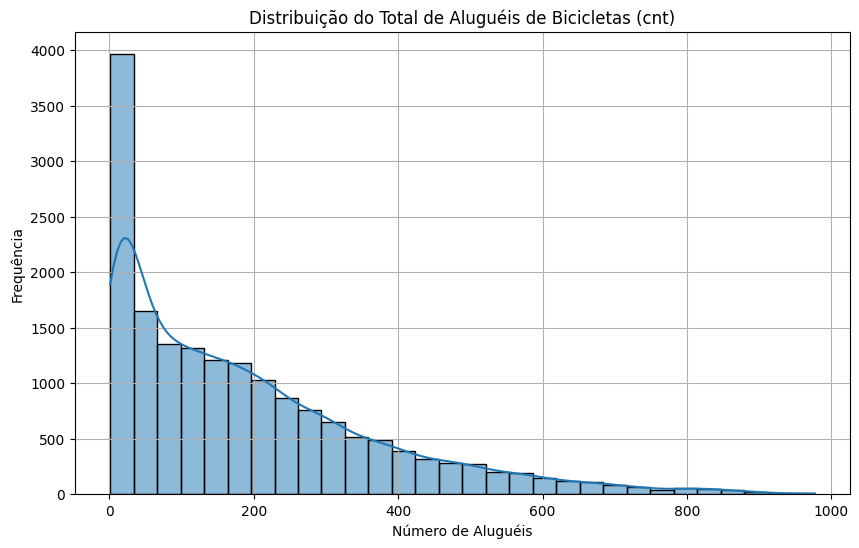

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['cnt'], kde=True, bins=30)
plt.title('Distribuição do Total de Aluguéis de Bicicletas (cnt)')
plt.xlabel('Número de Aluguéis')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()


O histograma da variável `cnt` revela uma distribuição assimétrica à direita. Isso indica que a maioria dos registros possui um número de aluguéis mais baixos, enquanto há alguns dias com demanda extremamente alta. Esse comportamento pode refletir uma combinação de fatores como clima, dia da semana e horário de pico. Esse padrão também pode indicar a necessidade de transformar essa variável em futuras etapas de modelagem para melhorar o desempenho de algoritmos sensíveis à distribuição dos dados.


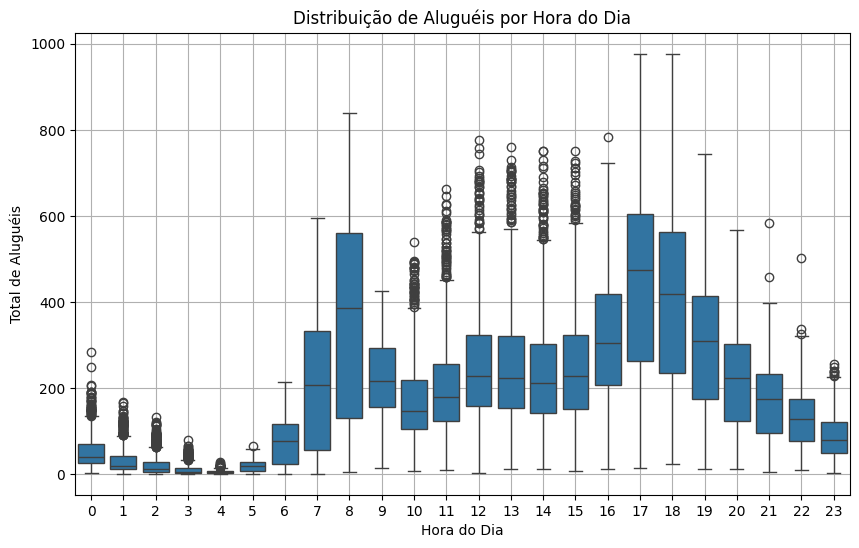

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='hr', y='cnt', data=df)
plt.title('Distribuição de Aluguéis por Hora do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Total de Aluguéis')
plt.grid(True)
plt.show()


A análise da variável `hr` mostra que há dois picos bem definidos na quantidade de aluguéis: entre 7h–9h e entre 17h–19h. Esses horários coincidem com os períodos de deslocamento para o trabalho e retorno para casa, sugerindo que muitas pessoas usam as bicicletas como meio de transporte durante a semana. Durante a madrugada (0h–5h), a demanda é muito baixa, o que é esperado para serviços de mobilidade urbana.


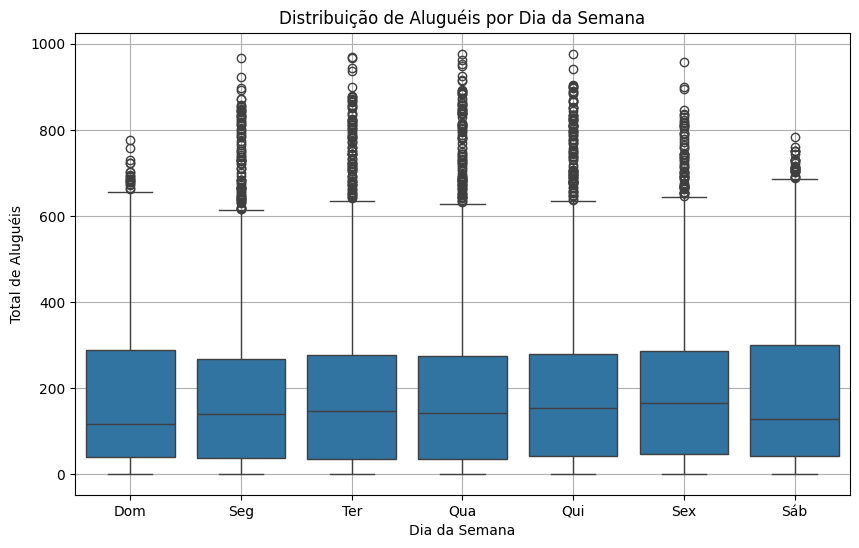

In [ ]:
dias = ['Dom','Seg','Ter','Qua','Qui','Sex','Sáb']
df['weekday_nome'] = df['weekday'].map(dict(zip(range(7), dias)))

plt.figure(figsize=(10,6))
sns.boxplot(x='weekday_nome', y='cnt', data=df, order=dias)
plt.title('Distribuição de Aluguéis por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Total de Aluguéis')
plt.grid(True)
plt.show()


A distribuição dos aluguéis ao longo dos dias da semana mostra um padrão interessante: nos dias úteis (segunda a sexta-feira), os valores de `cnt` são mais elevados e consistentes, com menor dispersão. Aos sábados e domingos, há maior variação e, em alguns casos, menor volume total. Isso pode indicar que o uso da bicicleta durante a semana está mais associado ao deslocamento diário, enquanto nos fins de semana o uso é mais recreativo ou sujeito a variações climáticas e eventos.


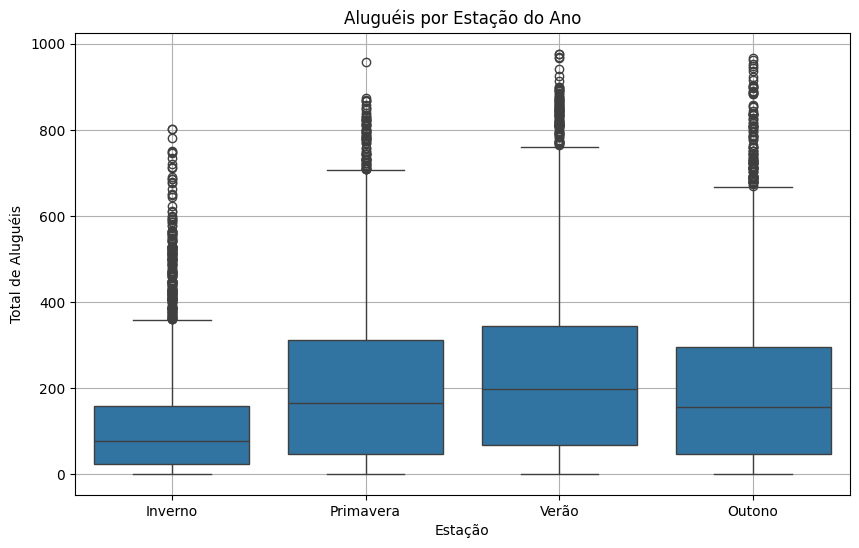

In [ ]:
estacoes = {1: 'Inverno', 2: 'Primavera', 3: 'Verão', 4: 'Outono'}
df['estacao_nome'] = df['season'].map(estacoes)

plt.figure(figsize=(10,6))
sns.boxplot(x='estacao_nome', y='cnt', data=df, order=['Inverno','Primavera','Verão','Outono'])
plt.title('Aluguéis por Estação do Ano')
plt.xlabel('Estação')
plt.ylabel('Total de Aluguéis')
plt.grid(True)
plt.show()


Observamos que os aluguéis de bicicleta são mais frequentes durante a primavera e o verão. Durante o inverno, o número de aluguéis diminui, o que pode estar associado ao clima mais frio e menos favorável para atividades ao ar livre. Essa análise reforça a influência da sazonalidade na demanda do serviço, sendo importante considerar esses ciclos em estratégias de planejamento.


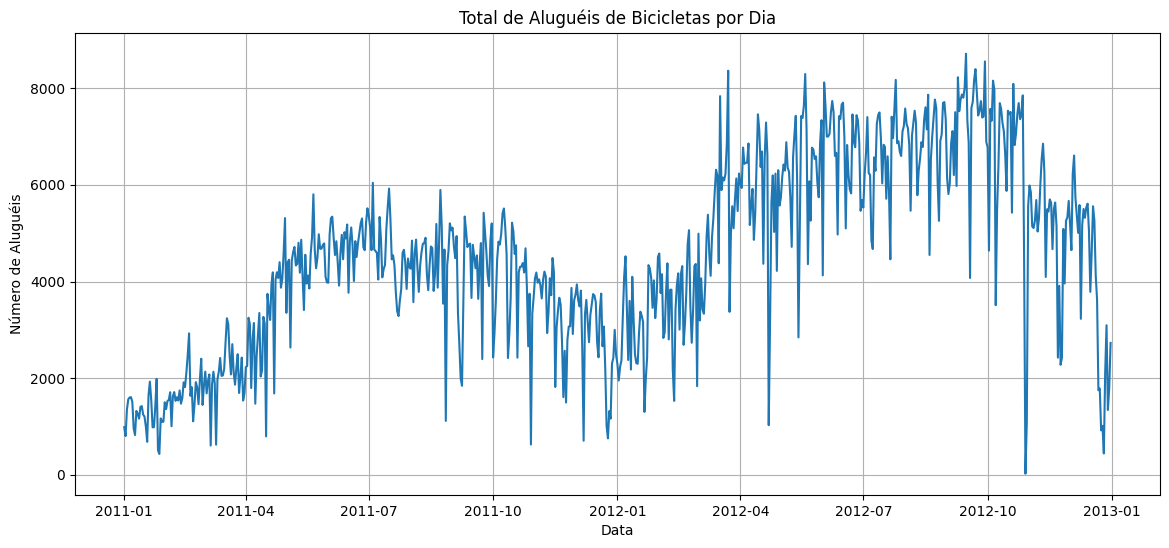

In [ ]:
df['dteday'] = pd.to_datetime(df['dteday'])  # garantir tipo datetime

# Aluguéis diários
alugueis_dia = df.groupby('dteday')['cnt'].sum().reset_index()

plt.figure(figsize=(14,6))
sns.lineplot(x='dteday', y='cnt', data=alugueis_dia)
plt.title('Total de Aluguéis de Bicicletas por Dia')
plt.xlabel('Data')
plt.ylabel('Número de Aluguéis')
plt.grid(True)
plt.show()


A série temporal dos aluguéis diários mostra uma tendência geral de crescimento ao longo do período observado. É possível identificar oscilações sazonais, com picos em determinadas épocas do ano e quedas em outras. Esses padrões podem ser influenciados por variáveis como estação do ano, condições climáticas ou até mesmo feriados e eventos locais.


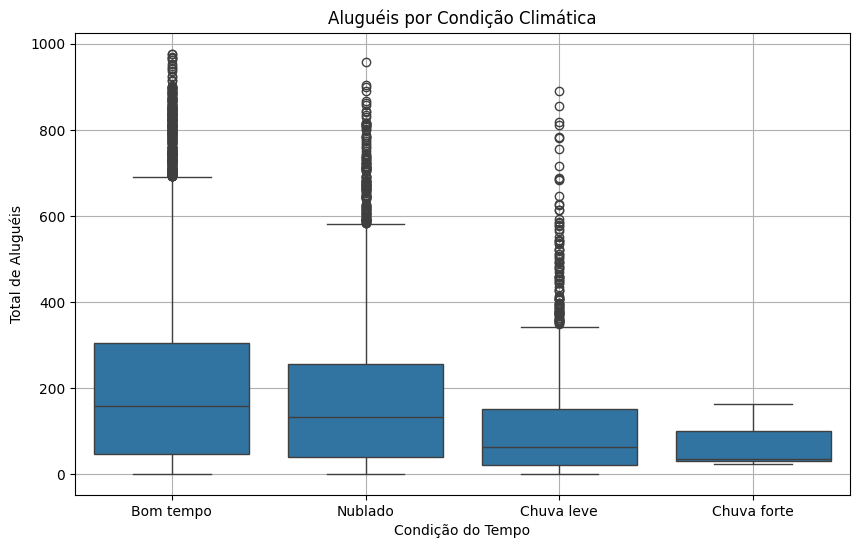

In [ ]:
condicoes = {
    1: 'Bom tempo',
    2: 'Nublado',
    3: 'Chuva leve',
    4: 'Chuva forte'  # pouco comum
}
df['tempo_nome'] = df['weathersit'].map(condicoes)

plt.figure(figsize=(10,6))
sns.boxplot(x='tempo_nome', y='cnt', data=df, order=['Bom tempo', 'Nublado', 'Chuva leve', 'Chuva forte'])
plt.title('Aluguéis por Condição Climática')
plt.xlabel('Condição do Tempo')
plt.ylabel('Total de Aluguéis')
plt.grid(True)
plt.show()


Como esperado, o clima influencia significativamente o uso das bicicletas. Em dias com bom tempo, há maior número de aluguéis. Já em dias nublados ou chuvosos, especialmente com chuva forte, a demanda despenca. Essa relação reforça a necessidade de considerar previsões climáticas em modelos preditivos de demanda ou na alocação de bicicletas pela cidade.


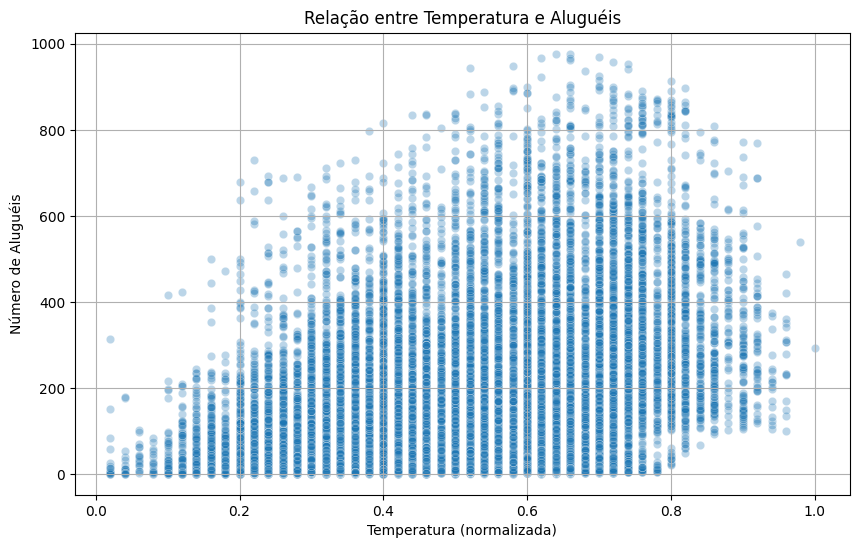

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='temp', y='cnt', data=df, alpha=0.3)
plt.title('Relação entre Temperatura e Aluguéis')
plt.xlabel('Temperatura (normalizada)')
plt.ylabel('Número de Aluguéis')
plt.grid(True)
plt.show()


A análise da dispersão entre temperatura e número de aluguéis revela uma correlação positiva: à medida que a temperatura aumenta, o número de aluguéis também tende a crescer, principalmente até um certo ponto. O comportamento é esperado, pois temperaturas agradáveis incentivam atividades ao ar livre. No entanto, temperaturas extremas (muito altas) podem não manter essa relação crescente.


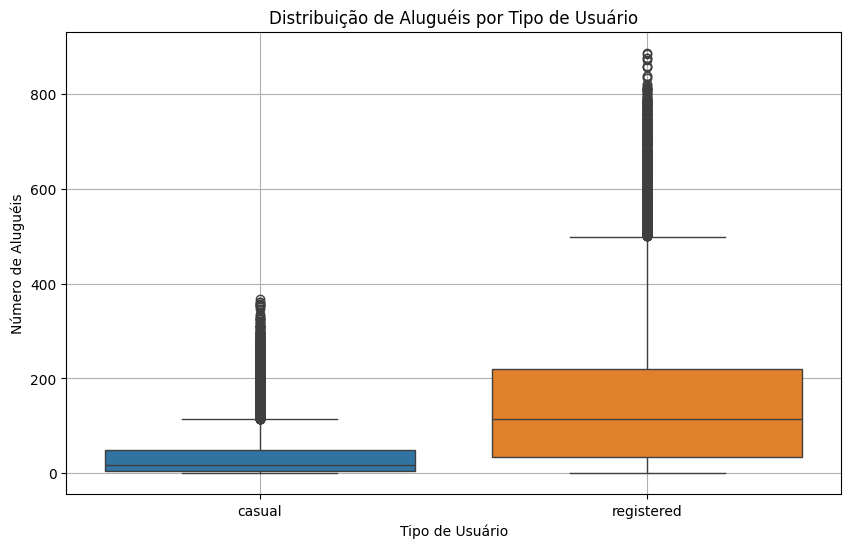

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[['casual', 'registered']])
plt.title('Distribuição de Aluguéis por Tipo de Usuário')
plt.xlabel('Tipo de Usuário')
plt.ylabel('Número de Aluguéis')
plt.grid(True)
plt.show()


Usuários registrados tendem a utilizar mais o sistema, com mediana de aluguéis consideravelmente maior em comparação aos usuários casuais. Isso indica que os usuários frequentes são responsáveis por grande parte da demanda e que o sistema pode estar mais alinhado com necessidades de mobilidade urbana diária, enquanto os usuários casuais apresentam comportamento mais esporádico.


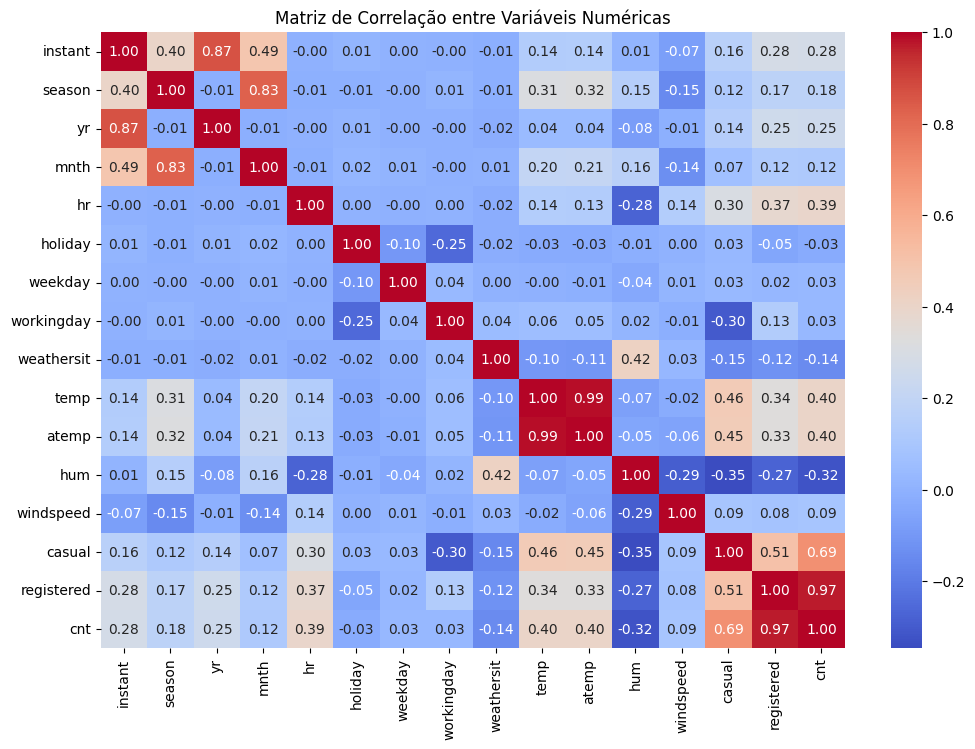

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.show()


A matriz de correlação revela que as variáveis `registered`, `temp`, `atemp` e `hr` são as mais correlacionadas positivamente com `cnt`. Isso indica que a demanda por bicicletas aumenta com temperaturas agradáveis e que o comportamento de usuários registrados tem um peso importante na previsão da variável-alvo. Por outro lado, variáveis como `hum` (umidade) têm correlação levemente negativa com `cnt`, o que pode refletir desconforto em dias muito úmidos.


## 6. Análise Visual

- A variável `cnt` apresenta uma distribuição assimétrica à direita, indicando muitos registros com baixa quantidade de aluguéis e poucos com valores altos.
- A demanda por bicicletas varia fortemente ao longo do dia, com picos por volta das 8h e 17h, sugerindo uso para deslocamento ao trabalho.
- Durante a semana, os padrões são diferentes: dias úteis têm picos nos horários de expediente, enquanto nos finais de semana o uso é mais distribuído.
- A estação do ano também influencia: verão e outono têm médias mais altas de aluguéis, o que pode estar ligado ao clima mais favorável.


In [ ]:
# Garantir que a coluna dteday esteja como datetime:
df['dteday'] = pd.to_datetime(df['dteday'])

In [ ]:
# Verificar valores duplicados
df.duplicated().sum()


np.int64(0)

In [ ]:
# One-hot encoding
df_encoded = pd.get_dummies(df, columns=['season', 'weathersit'], drop_first=True)


In [ ]:
# Normalização de variáveis
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['temp_norm', 'hum_norm', 'windspeed_norm']] = scaler.fit_transform(df[['temp', 'hum', 'windspeed']])


In [ ]:
# Salvar versão pré-processada
df.to_csv('bike_sharing_preprocessado.csv', index=False)


### 7. Pré-processamento de Dados

Nesta etapa, realizamos a limpeza e preparação do dataset para uso futuro. Primeiro, verificamos a presença de valores ausentes ou duplicados e confirmamos que o dataset está limpo. Em seguida, convertendo a coluna `dteday` para datetime, extraímos novas variáveis como `ano`, `mês` e `dia da semana`.

Também transformamos variáveis categóricas com one-hot encoding, permitindo que algoritmos de machine learning tratem esses dados corretamente. Por fim, aplicamos normalização em variáveis contínuas (`temp`, `hum`, `windspeed`) para que fiquem na mesma escala, o que melhora o desempenho de vários algoritmos de aprendizado.

Essas transformações tornam o dataset mais robusto e pronto para análises preditivas ou classificações futuras.


## 8. Checklist

- **Descrição do problema:**  
  Entender os fatores que influenciam o uso de bicicletas em um sistema de aluguel, com o objetivo de apoiar decisões de planejamento, alocação de bicicletas e previsão de demanda.

- **É um problema supervisionado ou não supervisionado?**  
  É um problema supervisionado de regressão (a variável alvo é contínua: `cnt` = número de aluguéis).

- **Premissas ou hipóteses sobre o problema:**  
  Acredita-se que clima, dia da semana, horário e estação do ano influenciam a demanda.  
  Supõe-se que há sazonalidade e picos diários associados ao deslocamento para o trabalho.

- **Restrições ou condições dos dados:**  
  Dados coletados de um único sistema de bicicletas compartilhadas; período, clima e horários limitados ao conjunto original.

- **Definição dos atributos:**

  - `season`: Estação do ano (1: inverno, 2: primavera, 3: verão, 4: outono).  
    Representa o ciclo sazonal, útil para analisar variações na demanda ao longo do ano.

  - `yr`: Ano do registro (0: 2011, 1: 2012).  
    Indica o ano de coleta dos dados, permitindo análises comparativas temporais.

  - `mnth`: Mês do ano (1 a 12).  
    Usado para identificar tendências mensais e padrões sazonais mais específicos.

  - `hr`: Hora do dia (0 a 23).  
    Essencial para entender os horários de pico no uso de bicicletas.

  - `weekday`: Dia da semana (0: domingo, 6: sábado).  
    Permite avaliar padrões diferentes entre dias úteis e fins de semana.

  - `weathersit`: Situação climática (1: limpo, 2: nublado, 3: chuva leve, 4: chuva forte).  
    Ajuda a identificar o impacto do clima no uso do serviço.

  - `temp`: Temperatura normalizada (valores entre 0 e 1).  
    Corresponde à temperatura real em graus Celsius dividida por 41.

  - `atemp`: Sensação térmica normalizada.  
    Mede a temperatura percebida, que pode impactar o conforto do usuário.

  - `hum`: Umidade relativa do ar (normalizada entre 0 e 1).  
    Pode afetar o conforto e, portanto, a decisão de alugar uma bicicleta.

  - `windspeed`: Velocidade do vento (normalizada).  
    Condições de vento extremo podem desestimular o uso das bikes.

  - `casual`: Número de usuários não registrados que alugaram bicicletas na hora.  
    Reflete uso mais espontâneo do sistema.

  - `registered`: Número de usuários registrados que usaram o sistema.  
    Indica uso mais rotineiro, possivelmente para deslocamento ao trabalho.

  - `cnt`: Contagem total de bicicletas alugadas (soma de `casual` + `registered`).  
    É a **variável alvo** (target), usada para prever demanda no sistema.



## 9. Conclusão

A análise exploratória permitiu identificar padrões claros no uso de bicicletas, com destaque para os horários de pico nos dias úteis, maior demanda em estações mais quentes e queda significativa em condições climáticas adversas. A variável `cnt` mostrou-se altamente correlacionada com fatores como `temp`, `hr` e `registered`.

Após o pré-processamento, o dataset encontra-se pronto para aplicação de modelos preditivos. O conhecimento obtido aqui pode ser utilizado para melhorar o planejamento da operação, prever demanda futura e oferecer uma melhor experiência ao usuário final.
